## Predicting the mortality rate of Cancer Patients
### Data link "https://www.kaggle.com/khoongweihao/cancer-dataset-aggregated"

In [32]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import os
%matplotlib inline

In [33]:
#Reading the Data
df=pd.read_csv("cancer_reg.csv",encoding='latin-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [34]:
df.shape

(3047, 34)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

### There are missing values in the data
### For variable "binnedInc" is a object type 


In [36]:
# changing the dtype from object to float
df['binnedInc']=df['binnedInc'].str.replace('(','')
df['binnedInc']=df['binnedInc'].str.replace('[','')
df['binnedInc']=df['binnedInc'].str.replace(']','')

df['binnedInc'].str.split(',',expand=True).astype(float)
x=df['binnedInc'].str.split(',',expand=True).astype(float)
y=(x[0]+x[1])/2
df['binnedInc']=y
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [37]:
#dropping the variable
df1=df.drop(['Geography'], axis = 1)
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   float64
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

### There are null values in the PctSomeCol18_24  ,PctEmployed16_Over,PctPrivateCoverageAlone 

In [39]:
# Replacing the null values
df1['PctEmployed16_Over']=df1['PctEmployed16_Over'].fillna(df1['PctEmployed16_Over'].median())
df1['PctSomeCol18_24']=df1['PctSomeCol18_24'].fillna(df1['PctSomeCol18_24'].median())
df1['PctPrivateCoverageAlone']=df1['PctPrivateCoverageAlone'].fillna(df1['PctPrivateCoverageAlone'].median())

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   float64
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

### Missing values replaced with median value.



In [41]:
# Data Visualization
# importing tha library
#from autoviz.AutoViz_Class import AutoViz_Class

# Creating the object
#df=AutoViz_Class()
#filename='cancer_reg.csv'
#sep=","
#dft=df.AutoViz('cancer_reg.csv',sep=",")

## Checking Outlier 

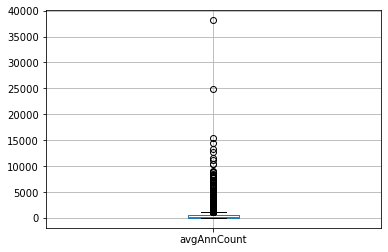

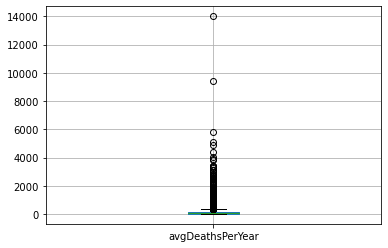

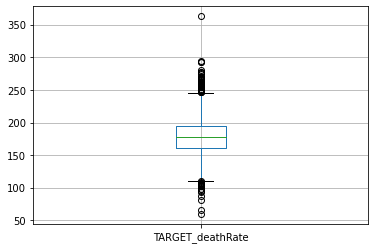

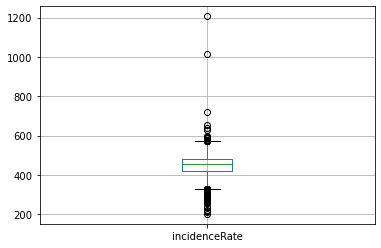

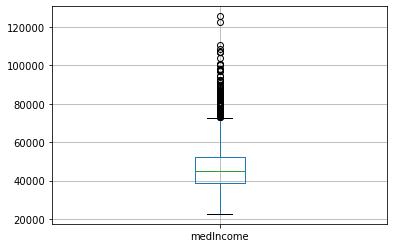

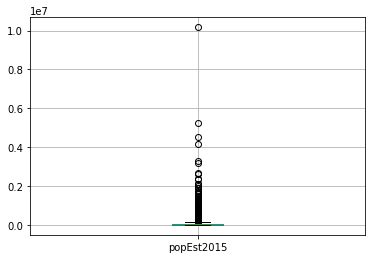

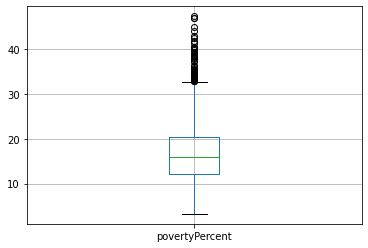

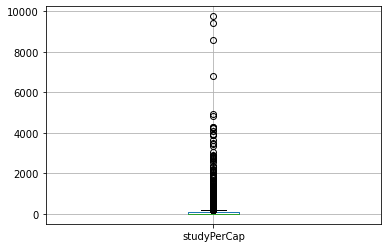

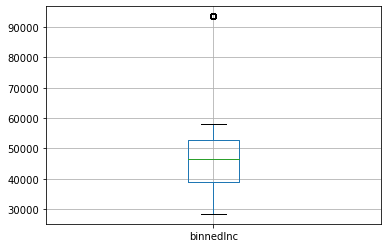

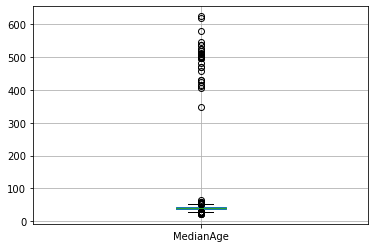

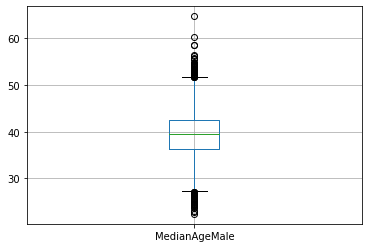

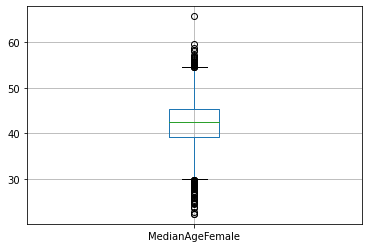

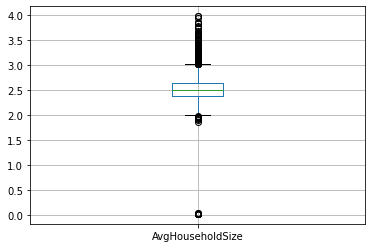

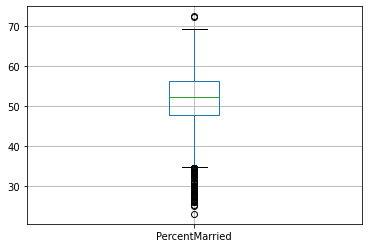

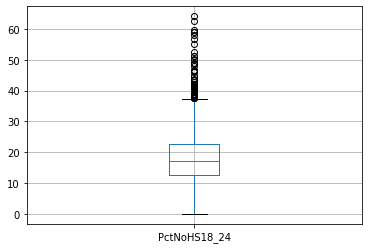

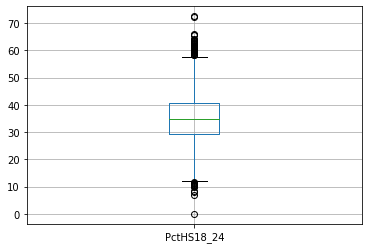

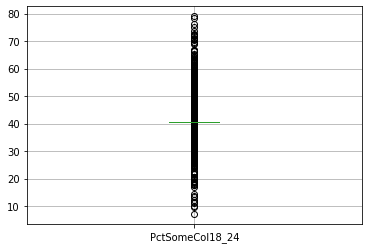

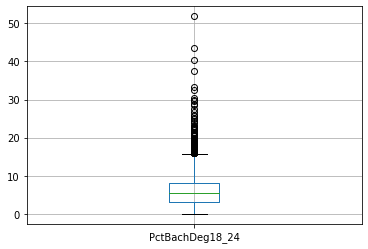

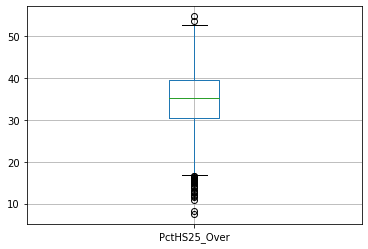

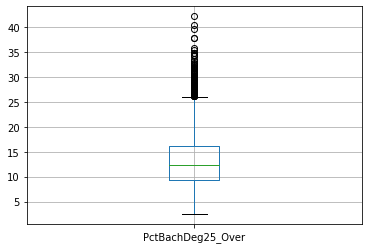

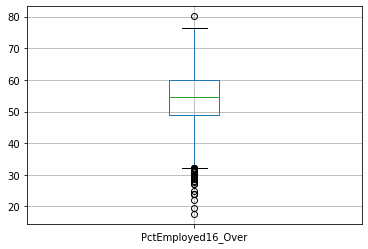

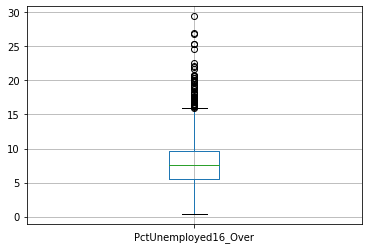

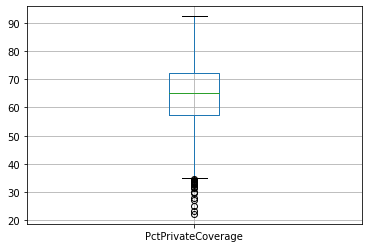

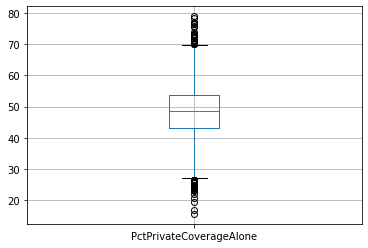

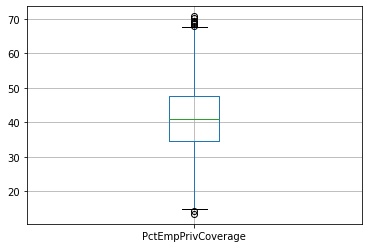

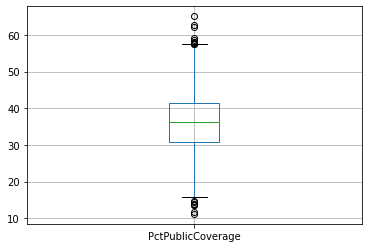

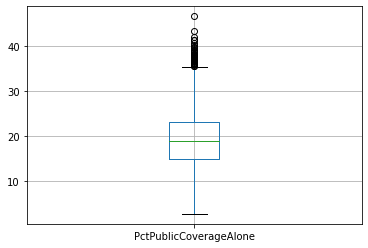

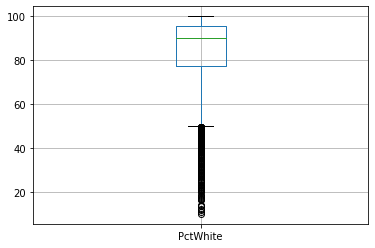

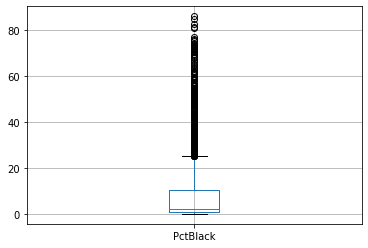

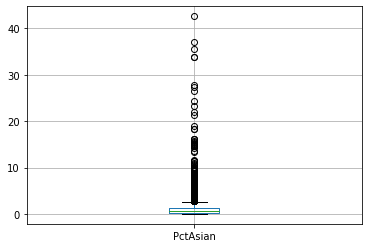

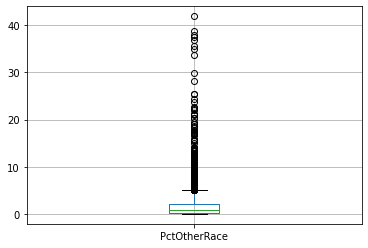

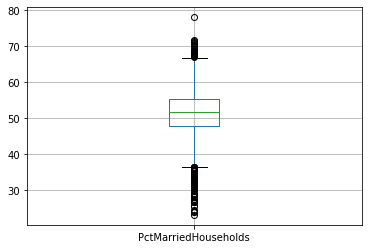

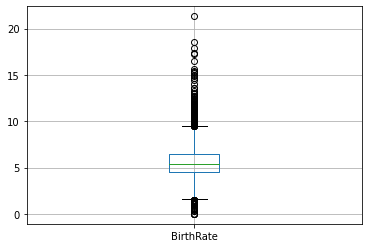

In [42]:
for i in df1:
    plt.figure()
    df1.boxplot(column=[i])

In [43]:
## Droping outlier for dependent variable
df1[(df1['TARGET_deathRate']>df1['TARGET_deathRate'].quantile(0.25)-(1.5*(st.iqr(df1['TARGET_deathRate']))))&
   (df1['TARGET_deathRate']<df1['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df1['TARGET_deathRate']))))]


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,93564.75,39.3,...,48.7,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,46611.30,44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,49534.00,30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,52796.00,30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,49534.00,39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


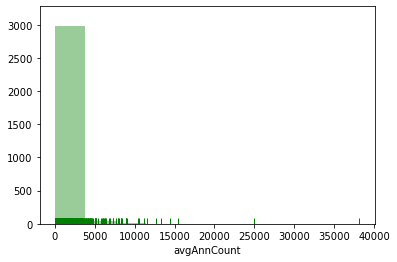

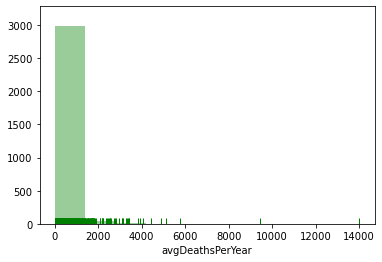

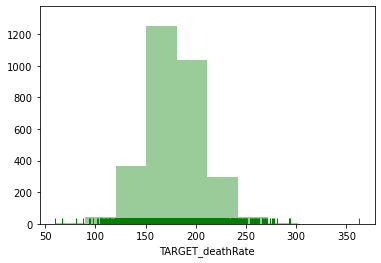

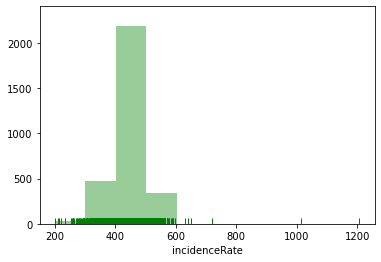

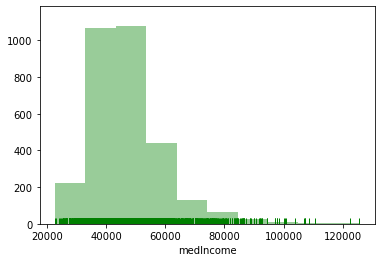

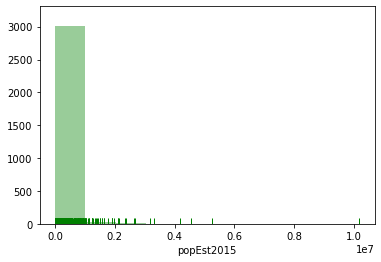

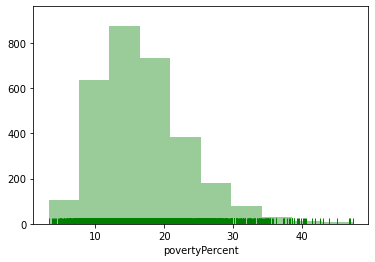

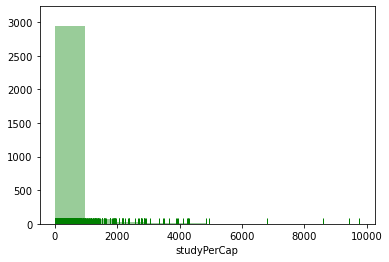

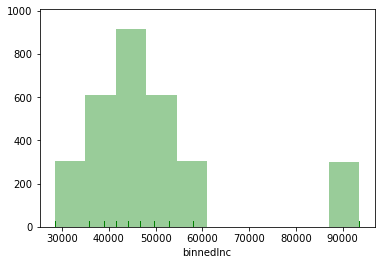

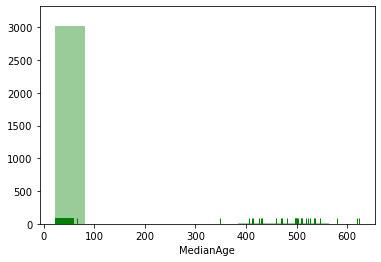

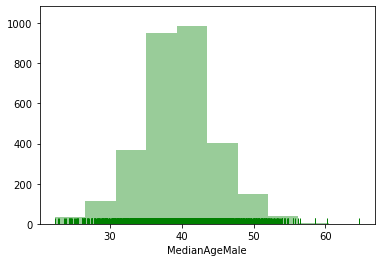

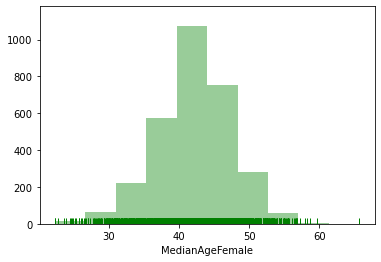

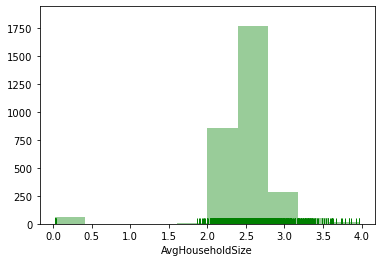

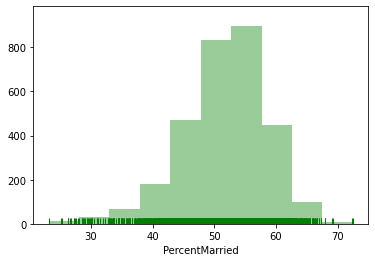

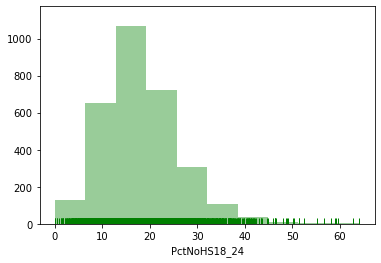

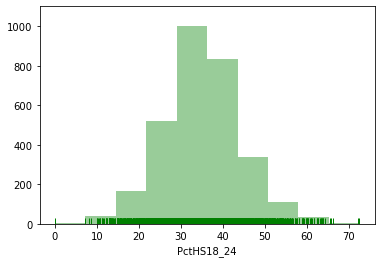

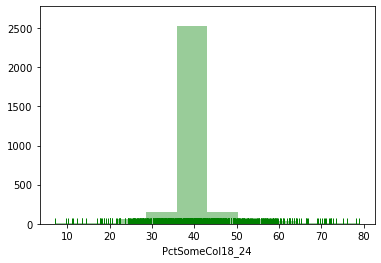

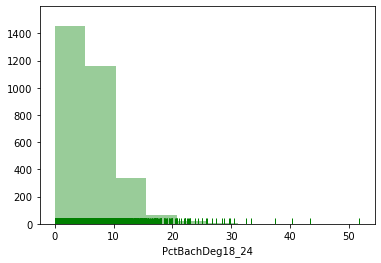

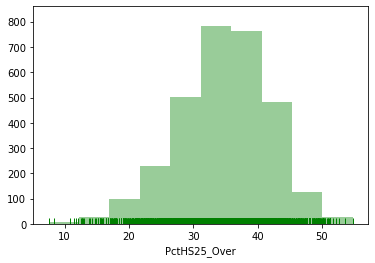

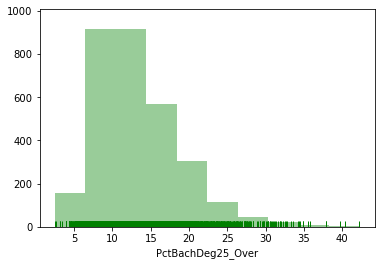

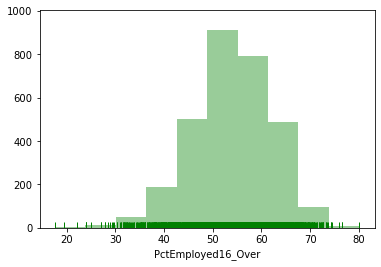

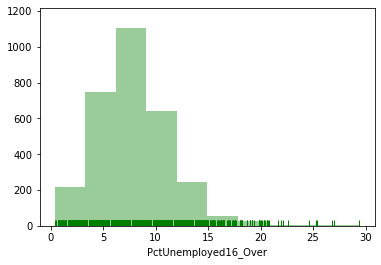

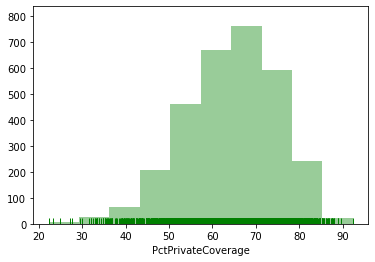

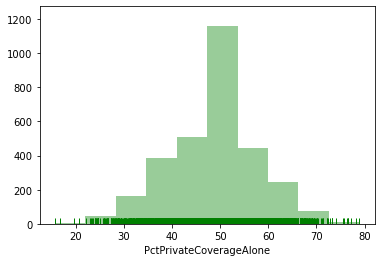

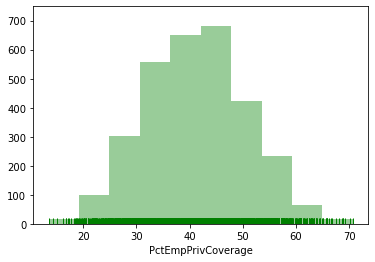

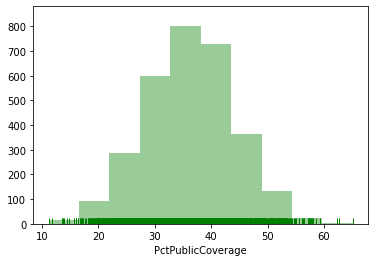

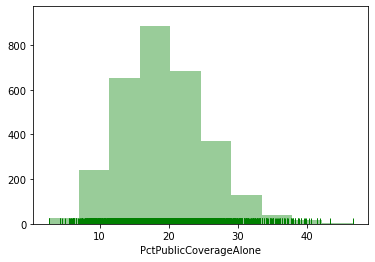

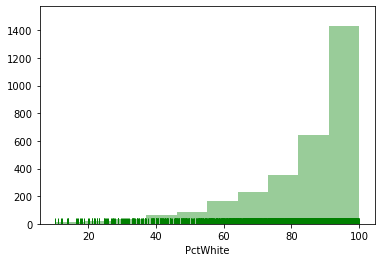

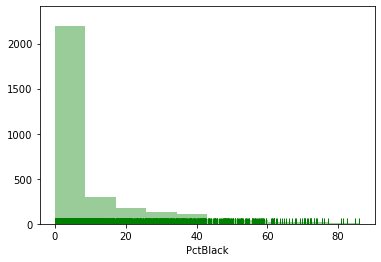

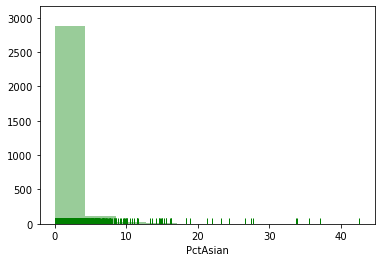

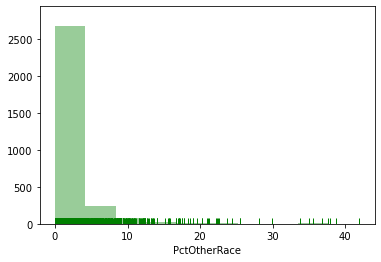

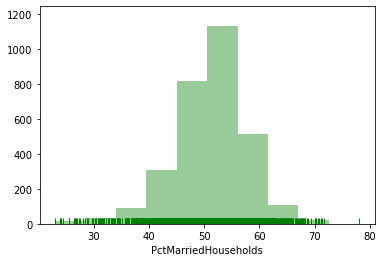

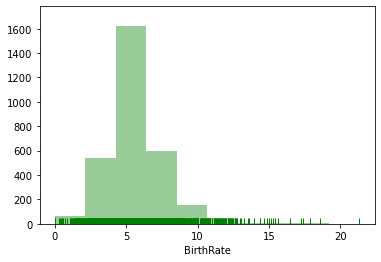

In [44]:
#Feature plot
for i in df1.columns:
    plt.figure()
    sns.distplot(df1[i],kde=False,color='g',bins=10,rug=True)

In [50]:
from sklearn.model_selection import train_test_split
X = df1.drop(["TARGET_deathRate"],axis=1)
Y = df1['TARGET_deathRate']
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3)
x_train

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
2748,752.0,291,343.0,39700,204275,22.6,44.058255,38888.25,33.8,32.3,...,37.7,31.3,41.5,26.3,77.141393,2.118362,1.297620,15.683270,57.697589,6.284513
2034,34.0,16,451.6,34684,4858,18.6,0.000000,35815.95,46.4,44.3,...,45.1,37.3,38.7,17.0,97.854954,0.408580,0.776302,0.040858,49.635701,14.978903
551,126.0,61,442.0,33181,16185,20.3,0.000000,28429.05,51.3,50.7,...,48.7,27.4,52.2,24.0,96.579171,0.255195,0.716977,0.236967,57.439188,5.886451
1252,101.0,49,431.7,35425,20566,24.7,0.000000,35815.95,36.7,35.3,...,39.5,35.1,44.7,29.7,59.103287,38.975880,0.350126,0.389029,50.851900,8.771930
823,47.0,22,379.0,26732,11514,41.4,0.000000,28429.05,34.6,32.9,...,48.7,23.5,39.8,24.0,36.182936,61.972543,0.075802,0.699065,34.236453,4.463337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,189.0,78,447.2,34522,39179,31.1,0.000000,35815.95,33.8,32.2,...,40.3,33.5,40.9,26.1,54.747012,40.480549,0.561912,0.940758,40.460708,3.688606
1594,32.0,17,405.2,51470,4168,10.9,0.000000,52796.00,51.0,49.6,...,53.9,37.7,35.8,11.0,98.025690,0.000000,0.000000,0.261656,55.527888,7.244318
2647,116.0,47,454.2,35351,19364,21.4,0.000000,35815.95,41.3,39.9,...,39.3,35.1,44.0,27.3,66.816809,30.327072,0.332702,2.206071,45.092975,7.219803
1524,162.0,82,393.5,46083,35042,14.9,0.000000,46611.30,40.7,40.0,...,45.0,38.4,37.1,20.1,85.778460,1.767911,0.086946,0.417343,56.367621,5.677852


In [51]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
model=clf.fit(x_train,y_train)
model

LinearRegression()

In [52]:
clf.predict(x_test)

array([168.84923486, 153.91718441, 174.10449875, 179.65400496,
       165.13522337, 195.05329675, 167.70052794, 176.60518018,
       169.82631024, 143.63682629, 190.61528856, 186.52209963,
       168.86697543, 189.85835451, 158.414798  , 173.78344099,
       165.20762667, 184.76776122, 164.66515759, 153.37584316,
       147.90571306, 169.9423861 , 168.50854668, 189.63139517,
       145.752944  , 198.62548327, 144.70474089, 166.46593189,
       176.40517549, 173.13647673, 204.75275474, 196.86382699,
       186.33018655, 174.51053666, 176.89352502, 198.3871668 ,
       168.61949628, 150.36761799, 194.68693205, 126.23345726,
       200.35560485, 202.18970253, 168.63758627, 184.55084759,
       171.91220664, 178.63284342, 179.49853528, 125.59437624,
       159.12026631, 218.34048965, 179.91187831, 177.98468166,
       161.48031291, 141.80325254, 225.60238035, 147.25525966,
       177.09381255, 166.24221776, 174.68933244, 161.29806329,
       156.58385696, 184.62091348, 201.17230307, 182.76

In [53]:
clf.score(x_test,y_test)

0.4879623320893166

### Predicting model score was 48% 